### Atlas Scientific Conductivity  
Conductivity Sensor for measuring the salt/ion concentration of liquids  

Manufacturer Link: https://www.atlas-scientific.com/conductivity.html  

In [1]:
import matplotlib.pyplot as plt

from meerkat.base import time
from meerkat import atlas, parser

In [2]:
# instance device and set output format to .csv (which is default)
dev = atlas.Conductivity(bus_n=1, output='csv')

#### Configuration

In [3]:
# device information: device type, firmware version
time.sleep(0.5)
dev.info()

('EC', '1.5')

In [4]:
# status of device power: restart code, input voltage Vcc
time.sleep(0.5)
dev.status()

('P', 5.02)

In [5]:
# set current temperature for compensation
time.sleep(0.5)
dev.temp_set(24.2)
time.sleep(0.5)
dev.temp_get()

24.19

In [6]:
# Dry and two point calibration
dev.cal_set_dry()
time.sleep(1)
dev.cal_set_low(2000)
time.sleep(1)
dev.cal_set_high(10000)
time.sleep(1)
dev.cal_get()

0

In [7]:
# clear calibration
time.sleep(1)
dev.cal_clear()
time.sleep(1)
dev.cal_get()

0

In [8]:
# probe type
time.sleep(0.5)
dev.set_probe_type(10.0)
time.sleep(0.5)
dev.get_probe_type()

10.0

#### Measurement  

In [9]:
# single conductivity measurement
dev.measure()

['0.00', '0', '0.00', '1.000']

In [10]:
# get one sample without description
dev.get('test_1')

['test_1', 0, '0.00', '0', '0.00', '1.000']

In [11]:
# get 5 samples with a description
dev.get('test_2', n=5)

[['test_2', 0, '0.00', '0', '0.00', '1.000'],
 ['test_2', 1, '0.00', '0', '0.00', '1.000'],
 ['test_2', 2, '0.00', '0', '0.00', '1.000'],
 ['test_2', 3, '0.00', '0', '0.00', '1.000'],
 ['test_2', 4, '0.00', '0', '0.00', '1.000']]

#### JSON Data Publishing    

In [12]:
# set the metadata publishing interval to every third sample
dev.json_writer.metadata_interval = 3

In [13]:
dev.publish(description='test_3', n=5)

['{"description": "test_3", "sample_n": 0, "conductivity": "0.00", "total_dissolved_solids": "0", "salinity": "0.00", "specific_gravity": "1.000", "std_time_ms": "2020-02-22 14:36:56.179801"}',
 '{"description": "test_3", "sample_n": 1, "conductivity": "0.00", "total_dissolved_solids": "0", "salinity": "0.00", "specific_gravity": "1.000", "std_time_ms": "2020-02-22 14:36:58.340660"}',
 '{"description": null, "sample_n": 2, "conductivity": "0.00", "total_dissolved_solids": "0", "salinity": "0.00", "specific_gravity": "1.000", "std_time_ms": "2020-02-22 14:37:00.497692", "name": "Atlas_Conductivity", "title": null, "format": null, "encoding": "utf-8", "bytes": null, "hash": null, "schema": null, "sources": null, "licenses": null, "line_terminator": "\\n", "quote_char": "\\"", "double_quote": true, "escape_char": "\\\\", "null_sequence": "NA", "comment": "#", "skip_lines": 0, "path": null, "device": {"name": "Atlas_Conductivity", "version_hw": "1.0", "version_sw": "1.0", "accuracy": "+/-2

In [14]:
# write 5 samples to .csv file with description
dev.write(description='test_4', n=5)

In [15]:
# name of file written
dev.csv_writer.path

'2020_02_22_14_37_07_data.csv'

In [16]:
!head $dev.csv_writer.path

#!{"name": "Atlas_Conductivity", "title": null, "description": null, "format": null, "encoding": "utf-8", "bytes": null, "hash": null, "schema": null, "sources": null, "licenses": null, "line_terminator": "\n", "quote_char": "\"", "double_quote": true, "escape_char": "\\", "null_sequence": "NA", "comment": "#", "skip_lines": 1, "path": "2020_02_22_14_37_07_data.csv", "device": {"name": "Atlas_Conductivity", "version_hw": "1.0", "version_sw": "1.0", "accuracy": "+/-2%", "precision": "0.07-500000 uS/cm", "bus": "<meerkat.i2c_pi.WrapI2C object at 0xacfad530>", "state": null, "active": null, "error": null, "dtype": null, "description": "Water conductivity", "urls": "www.atlas-scientific.com/conductivity.html", "manufacturer": "Atlas Scientific", "calibration_date": null, "units": "uS/cm"}, "units": null, "dtypes": null, "accuracy": null, "precision": null, "time_format": "std_time_ms", "strfmtime": "%Y-%m-%d %H:%M:%S.%f", "version": "0.1 Alpha", "standard": "Follow RFC 4180", "media_type":

In [17]:
# load .csv data written with dev.write
m, df = parser.csv_resource(dev.csv_writer.path)

In [18]:
df

,std_time_ms,description,sample_n,conductivity,total_dissolved_solids,salinity,specific_gravity,datetime64_ns
0,2020-02-22 14:37:07.012734,test_4,0,0.0,0,0.0,1.0,2020-02-22 14:37:07.012734
1,2020-02-22 14:37:09.173793,test_4,1,0.0,0,0.0,1.0,2020-02-22 14:37:09.173793
2,2020-02-22 14:37:11.335004,test_4,2,0.0,0,0.0,1.0,2020-02-22 14:37:11.335004
3,2020-02-22 14:37:13.496269,test_4,3,0.0,0,0.0,1.0,2020-02-22 14:37:13.496269
4,2020-02-22 14:37:15.657524,test_4,4,0.0,0,0.0,1.0,2020-02-22 14:37:15.657524


In [19]:
df.datetime64_ns = df.datetime64_ns.dt.tz_localize('UTC')  # Pandas 0.24.1 hack

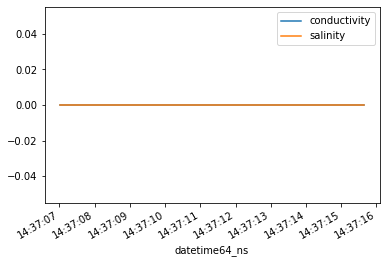

In [20]:
df[["datetime64_ns", "conductivity", "salinity"]].plot(x="datetime64_ns");

#### JSON Writer Output

In [21]:
dev.writer_output = "json"

In [22]:
# get 7 samples with a description
dev.write(description='test_5', n=7)

In [23]:
# name of file written
dev.json_writer.path

'2020_02_22_14_37_20.jsontxt'

In [24]:
!head $dev.json_writer.path

{"description": "test_5", "sample_n": 0, "conductivity": "0.00", "total_dissolved_solids": "0", "salinity": "0.00", "specific_gravity": "1.000", "std_time_ms": "2020-02-22 14:37:20.480022"}
{"description": "test_5", "sample_n": 1, "conductivity": "0.00", "total_dissolved_solids": "0", "salinity": "0.00", "specific_gravity": "1.000", "std_time_ms": "2020-02-22 14:37:22.641878"}
{"description": null, "sample_n": 2, "conductivity": "0.00", "total_dissolved_solids": "0", "salinity": "0.00", "specific_gravity": "1.000", "std_time_ms": "2020-02-22 14:37:24.802907", "name": "Atlas_Conductivity", "title": null, "format": null, "encoding": "utf-8", "bytes": null, "hash": null, "schema": null, "sources": null, "licenses": null, "line_terminator": "\n", "quote_char": "\"", "double_quote": true, "escape_char": "\\", "null_sequence": "NA", "comment": "#", "skip_lines": 0, "path": "2020_02_22_14_37_20.jsontxt", "device": {"name": "Atlas_Conductivity", "version_hw": "1.0", "version_sw": "1.0", "accur